In [1]:
# Ссылка на гугл коллаб
# https://colab.research.google.com/drive/1a6dbpcdTSj8CeGr2c_79m5ZwRrRopZ_c?usp=sharing

# Explorary data Analysis

### Импортирование зависимостей

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

%matplotlib inline     
sns.set(color_codes=True)

In [3]:
!ls -la

total 24
drwxr-xr-x 1 root root 4096 Jan 10 13:07 .
drwxr-xr-x 1 root root 4096 Jan 10 13:01 ..
drwxr-xr-x 4 root root 4096 Dec 23 14:32 .config
drwxr-xr-x 2 root root 4096 Jan 10 13:07 .ipynb_checkpoints
drwxr-xr-x 2 root root 4096 Jan 10 13:08 Kaggle
drwxr-xr-x 1 root root 4096 Dec 23 14:32 sample_data


fixed acidity - фиксированная кислотность <br>
volatile acidity - летучая кислотность <br>
citric acid - лимонная кислота <br>
residual sugar - остаточный сахар <br>
chlorides - хлориды <br>
free sulfur dioxide - свободный диоксид серы <br>
total sulfur dioxide- диоксид серы общий <br>
density - плотность <br>
pH - рН <br>
sulphates - сульфаты <br>


### Загрузка данных и отображение фрейма

In [4]:
df = pd.read_csv("Kaggle/winequality-red.csv")
df.head(5) # Показываем первые 5 элементов

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.tail(5) # Показываем последние 5 элементов

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### Проверка типов данных

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Переименовывание ячеек

In [7]:
df = df.rename(columns={
    "fixed acidity": "FA",
    "volatile acidity": "VA",
    "citric acid": "CA",
    "residual sugar": "RS",
    "free sulfur dioxide": "FSD",
    "total sulfur dioxide": "total_SD"
})
df.head(5)

,FA,VA,CA,RS,chlorides,FSD,total_SD,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.shape

(1599, 12)

### Удаление дупликатов

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (240, 12)


In [10]:
df.count()

FA           1599
VA           1599
CA           1599
RS           1599
chlorides    1599
FSD          1599
total_SD     1599
density      1599
pH           1599
sulphates    1599
alcohol      1599
quality      1599
dtype: int64

In [11]:
df = df.drop_duplicates()
df.head(5)

,FA,VA,CA,RS,chlorides,FSD,total_SD,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [12]:
df.count()

FA           1359
VA           1359
CA           1359
RS           1359
chlorides    1359
FSD          1359
total_SD     1359
density      1359
pH           1359
sulphates    1359
alcohol      1359
quality      1359
dtype: int64

### Детектирование и удаление пустых или нулевых ячеек

In [13]:
print(df.isnull().sum()) # Кол-во нулевых ячеек.

FA           0
VA           0
CA           0
RS           0
chlorides    0
FSD          0
total_SD     0
density      0
pH           0
sulphates    0
alcohol      0
quality      0
dtype: int64


### Определение выброса

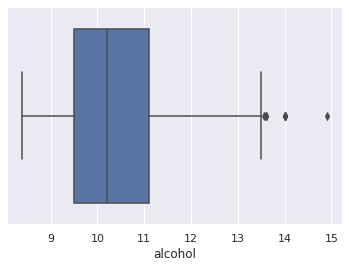

In [14]:
sns.boxplot(x=df["alcohol"]) # Алкоголь

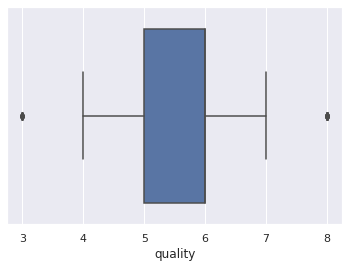

In [15]:
sns.boxplot(x=df["quality"]) # Качество

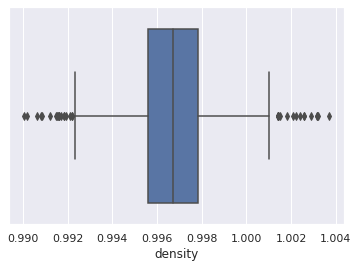

In [16]:
sns.boxplot(x=df["density"]) # Алкоголь

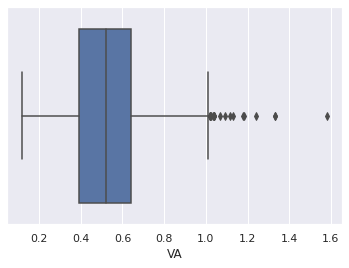

In [17]:
sns.boxplot(x=df["VA"]) # Алкоголь

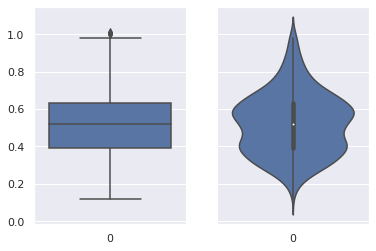

In [51]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["VA"], ax=axes[0])
sns.violinplot(data=df["VA"], ax=axes[1]);

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

FA            2.10000
VA            0.25000
CA            0.34000
RS            0.70000
chlorides     0.02100
FSD          14.00000
total_SD     41.00000
density       0.00222
pH            0.19000
sulphates     0.18000
alcohol       1.60000
quality       1.00000
dtype: float64


In [19]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] # Применение техники IQR
df.shape

(1005, 12)

### Отрисовка диаграмм

#### Гистограммы

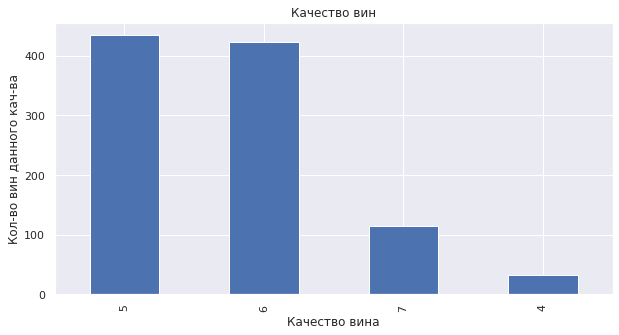

In [20]:
df.quality.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Качество вин")
plt.ylabel('Кол-во вин данного кач-ва')
plt.xlabel('Качество вина');

### Карты тепла
Тепловые карты — это тип графика, который необходим, когда нам нужно найти зависимые переменные. Один из лучших способов найти взаимосвязь между функциями — использовать тепловые карты.


,FA,VA,CA,RS,chlorides,FSD,total_SD,density,pH,sulphates,alcohol,quality
FA,1.000000,-0.282019,0.655777,0.239487,0.202368,-0.144925,-0.087810,0.610015,-0.692128,0.185839,-0.025770,0.121315
VA,-0.282019,1.000000,-0.621121,0.021976,0.124282,-0.018433,0.099376,0.043580,0.241762,-0.308814,-0.222085,-0.348293
CA,0.655777,-0.621121,1.000000,0.155535,0.065903,-0.067158,0.011869,0.289552,-0.477620,0.270070,0.152067,0.220871
RS,0.239487,0.021976,0.155535,1.000000,0.259101,0.085180,0.186835,0.396153,-0.073672,0.053014,0.091426,0.013534
chlorides,0.202368,0.124282,0.065903,0.259101,1.000000,0.026697,0.181407,0.424603,-0.184797,-0.069210,-0.291450,-0.183684
FSD,-0.144925,-0.018433,-0.067158,0.085180,0.026697,1.000000,0.623980,-0.012027,0.119040,0.089043,-0.050641,-0.015978
total_SD,-0.087810,0.099376,0.011869,0.186835,0.181407,0.623980,1.000000,0.150321,-0.010152,-0.060509,-0.265482,-0.208359
density,0.610015,0.043580,0.289552,0.396153,0.424603,-0.012027,0.150321,1.000000,-0.241898,0.091304,-0.538401,-0.215042
pH,-0.692128,0.241762,-0.477620,-0.073672,-0.184797,0.119040,-0.010152,-0.241898,1.000000,0.005097,0.118311,-0.061311
sulphates,0.185839,-0.308814,0.270070,0.053014,-0.069210,0.089043,-0.060509,0.091304,0.005097,1.000000,0.268061,0.418719


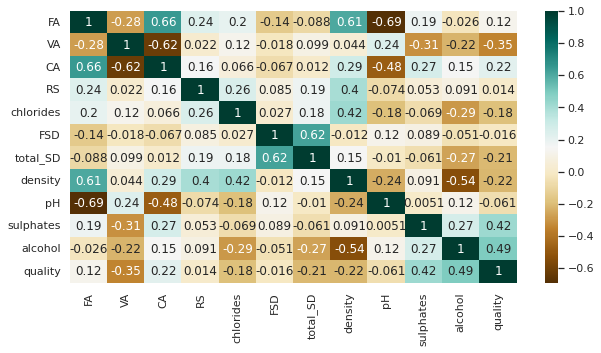

In [21]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

#### Диаграмма рассеивания
Используется для нахождения кореляции между двумя переменными. Здесь графики разброса построены между качеством вина и алкогольной составляющей

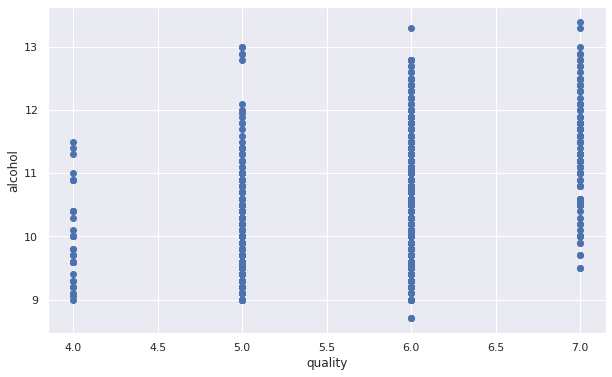

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['quality'], df['alcohol'])
ax.set_xlabel('quality')
ax.set_ylabel('alcohol')
plt.show()

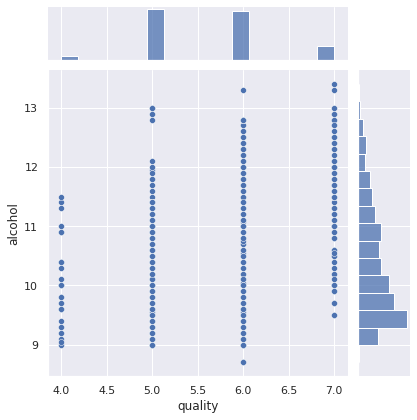

In [54]:
sns.jointplot(x="quality", y="alcohol", data=df, kind="scatter");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


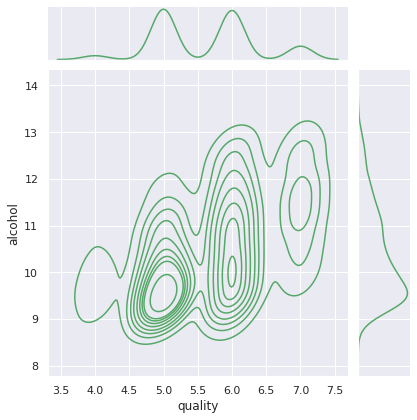

In [55]:
sns.jointplot(
    "quality", "alcohol", data=df, kind="kde", color="g"
);

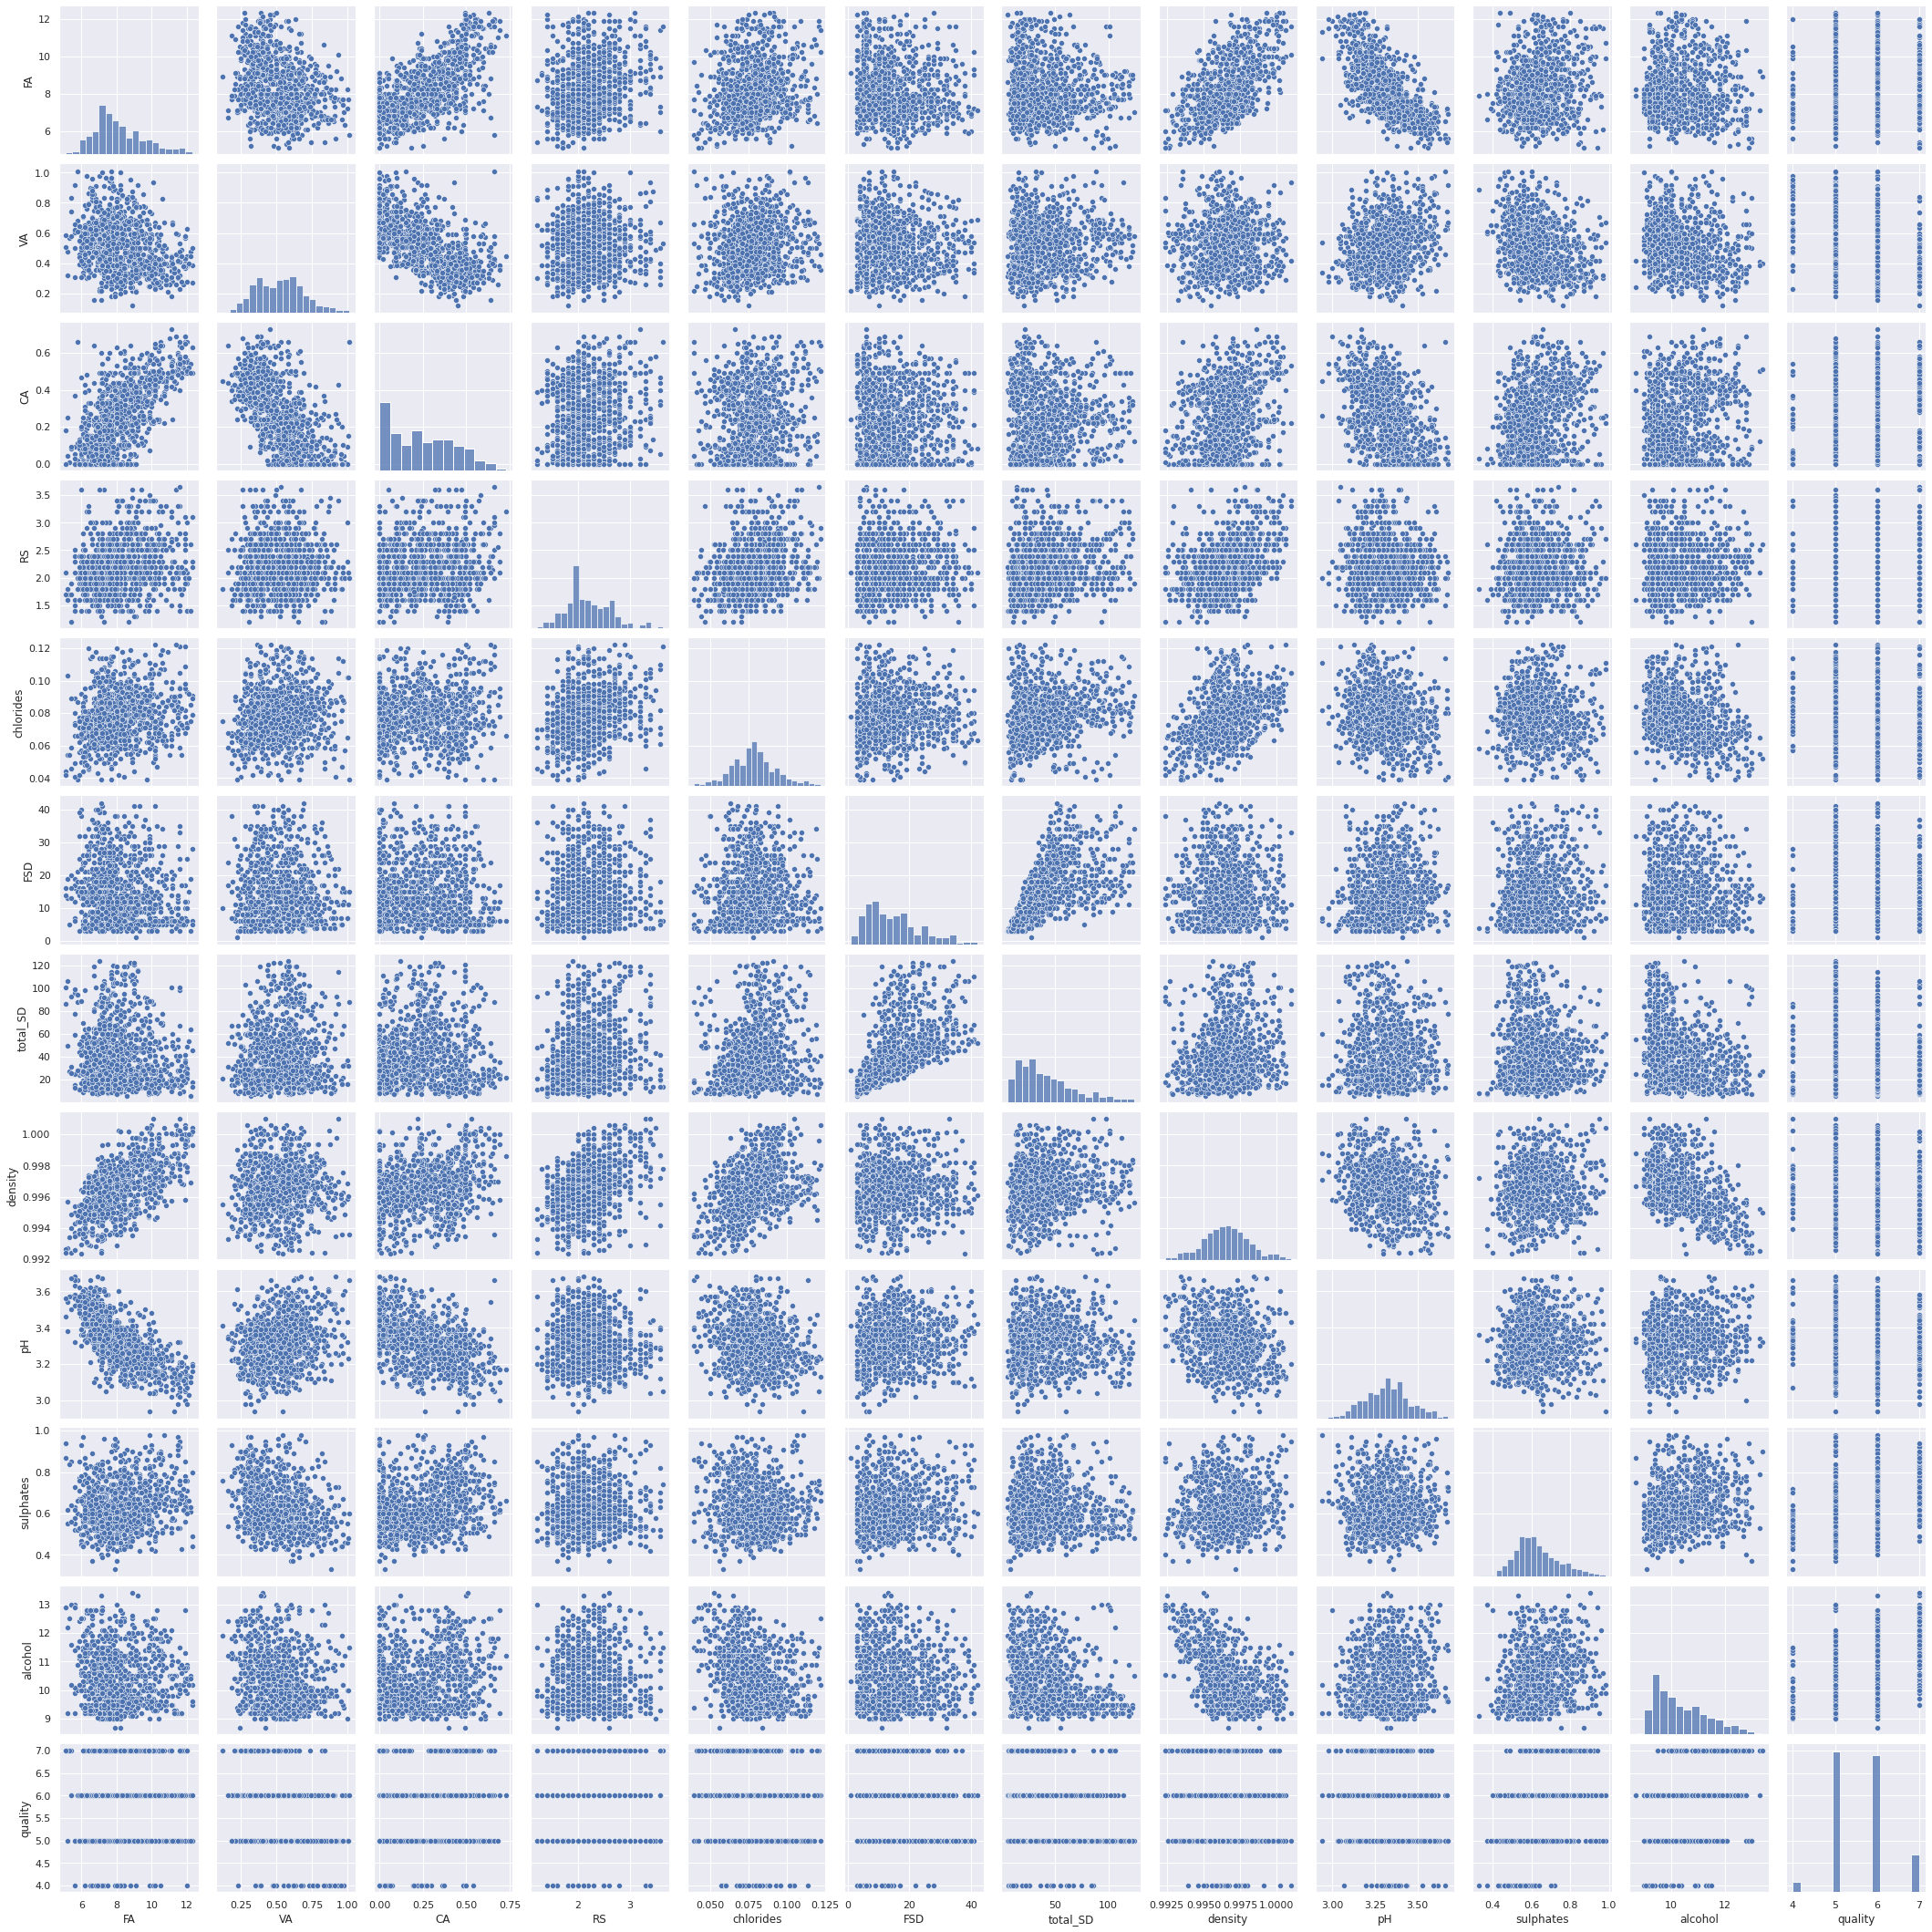

In [60]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


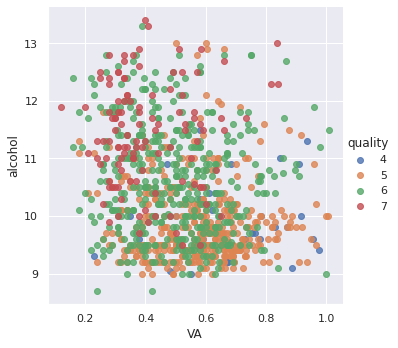

In [64]:
sns.lmplot(
    "VA", "alcohol", data=df, hue="quality", fit_reg=False
);

# ML Course 1

In [23]:
df

,FA,VA,CA,RS,chlorides,FSD,total_SD,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [24]:
df["quality"].mean()

5.616915422885572

In [25]:
df[df["quality"] == 6].mean()

FA            8.215130
VA            0.496418
CA            0.260875
RS            2.188534
chlorides     0.076927
FSD          15.352246
total_SD     38.706856
density       0.996433
pH            3.326454
sulphates     0.652861
alcohol      10.601300
quality       6.000000
dtype: float64

In [26]:
df[df["quality"] == 6]["alcohol"].mean()

10.601300236406626

In [27]:
df.loc[0:7, "density":"quality"]

,density,pH,sulphates,alcohol,quality
0,0.9978,3.51,0.56,9.4,5
1,0.9968,3.20,0.68,9.8,5
2,0.9970,3.26,0.65,9.8,5
3,0.9980,3.16,0.58,9.8,6
5,0.9978,3.51,0.56,9.4,5
6,0.9964,3.30,0.46,9.4,5
7,0.9946,3.39,0.47,10.0,7


In [28]:
df.iloc[0:5, 0:3]

,FA,VA,CA
0,7.4,0.70,0.00
1,7.8,0.88,0.00
2,7.8,0.76,0.04
3,11.2,0.28,0.56
5,7.4,0.66,0.00


In [29]:
df[-1:]

,FA,VA,CA,RS,chlorides,FSD,total_SD,density,pH,sulphates,alcohol,quality
1598,6.0,0.31,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [30]:
df.apply(np.max)

FA            12.300
VA             1.010
CA             0.730
RS             3.650
chlorides      0.122
FSD           42.000
total_SD     124.000
density        1.001
pH             3.680
sulphates      0.980
alcohol       13.400
quality        7.000
dtype: float64

In [31]:
df[df["quality"].apply(lambda alcohol: alcohol > 5)].head()

,FA,VA,CA,RS,chlorides,FSD,total_SD,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7
20,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.9968,3.39,0.53,9.4,6


In [33]:
# смысл понятен, но в данном датасете отсутствуют булевые столбцы
d = {"true": False, "false": True}
# df["Iquality"] = df["quality"].map(d)
# df.head()

In [37]:
columns_to_show = ["alcohol", "quality", "FA"]

df.groupby(["quality"])[columns_to_show].describe(percentiles=[])

alcohol                            ...        FA                
          count       mean       std  min  ...       std  min  50%   max
quality                                    ...                          
4          33.0  10.001515  0.713758  9.0  ...  1.362630  5.6  8.0  12.0
5         434.0   9.891705  0.702100  9.0  ...  1.339602  5.2  7.7  12.3
6         423.0  10.601300  0.954617  8.7  ...  1.535414  5.4  7.8  12.3
7         115.0  11.429130  0.902943  9.5  ...  1.652259  5.1  8.5  12.0

[4 rows x 18 columns]

In [38]:
columns_to_show = ["alcohol", "quality", "FA"]

df.groupby(["quality"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

alcohol                       ...        FA                     
              mean       std amin  amax  ...      mean       std amin  amax
quality                                  ...                               
4        10.001515  0.713758  9.0  11.5  ...  8.036364  1.362630  5.6  12.0
5         9.891705  0.702100  9.0  13.0  ...  8.007834  1.339602  5.2  12.3
6        10.601300  0.954617  8.7  13.3  ...  8.215130  1.535414  5.4  12.3
7        11.429130  0.902943  9.5  13.4  ...  8.628696  1.652259  5.1  12.0

[4 rows x 12 columns]

In [40]:
pd.crosstab(df["quality"], df["alcohol"])

alcohol,8.700000,9.000000,9.050000,9.100000,9.200000,9.300000,9.400000,9.500000,9.550000,9.600000,9.700000,9.800000,9.900000,10.000000,10.033333,10.100000,10.200000,10.300000,10.400000,10.500000,10.550000,10.600000,10.700000,10.750000,10.800000,10.900000,11.000000,11.066667,11.100000,11.200000,11.300000,11.400000,11.500000,11.600000,11.700000,11.800000,11.900000,11.950000,12.000000,12.100000,12.200000,12.300000,12.400000,12.500000,12.600000,12.700000,12.800000,12.900000,13.000000,13.300000,13.400000
quality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,0,1,1,1,2,2,1,0,0,5,2,2,0,4,0,1,0,1,3,0,0,0,0,0,0,3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,6,0,10,35,31,42,57,1,25,26,35,14,24,0,16,14,9,10,15,0,5,6,0,5,6,14,0,2,4,3,5,1,1,1,2,1,1,1,1,0,0,0,0,0,0,1,2,2,0,0
6,2,5,0,3,11,8,15,26,1,11,11,17,12,21,1,14,17,10,18,17,1,9,12,1,16,17,13,1,11,14,10,15,11,5,6,12,8,0,6,3,5,4,6,6,2,2,6,0,0,1,0
7,0,0,0,0,0,0,0,2,0,0,2,0,2,5,0,1,2,1,1,6,1,4,0,0,3,2,6,0,4,7,6,1,5,5,7,6,3,0,3,4,1,3,4,6,1,2,3,3,1,1,1


In [41]:
pd.crosstab(df["quality"], df["alcohol"], normalize=True)

alcohol,8.700000,9.000000,9.050000,9.100000,9.200000,9.300000,9.400000,9.500000,9.550000,9.600000,9.700000,9.800000,9.900000,10.000000,10.033333,10.100000,10.200000,10.300000,10.400000,10.500000,10.550000,10.600000,10.700000,10.750000,10.800000,10.900000,11.000000,11.066667,11.100000,11.200000,11.300000,11.400000,11.500000,11.600000,11.700000,11.800000,11.900000,11.950000,12.000000,12.100000,12.200000,12.300000,12.400000,12.500000,12.600000,12.700000,12.800000,12.900000,13.000000,13.300000,13.400000
quality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,0.00000,0.000995,0.000995,0.000995,0.001990,0.001990,0.000995,0.000000,0.000000,0.004975,0.001990,0.001990,0.00000,0.003980,0.000000,0.000995,0.000000,0.000995,0.002985,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.002985,0.000995,0.000000,0.000000,0.000000,0.000995,0.000995,0.000995,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.005970,0.000000,0.009950,0.034826,0.030846,0.041791,0.056716,0.000995,0.024876,0.025871,0.034826,0.01393,0.023881,0.000000,0.015920,0.013930,0.008955,0.009950,0.014925,0.000000,0.004975,0.00597,0.000000,0.004975,0.005970,0.013930,0.000000,0.001990,0.003980,0.002985,0.004975,0.000995,0.000995,0.000995,0.00199,0.000995,0.000995,0.000995,0.000995,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000995,0.001990,0.001990,0.000000,0.000000
6,0.00199,0.004975,0.000000,0.002985,0.010945,0.007960,0.014925,0.025871,0.000995,0.010945,0.010945,0.016915,0.01194,0.020896,0.000995,0.013930,0.016915,0.009950,0.017910,0.016915,0.000995,0.008955,0.01194,0.000995,0.015920,0.016915,0.012935,0.000995,0.010945,0.013930,0.009950,0.014925,0.010945,0.004975,0.005970,0.01194,0.007960,0.000000,0.005970,0.002985,0.004975,0.003980,0.00597,0.00597,0.001990,0.00199,0.005970,0.000000,0.000000,0.000995,0.000000
7,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001990,0.000000,0.000000,0.001990,0.000000,0.00199,0.004975,0.000000,0.000995,0.001990,0.000995,0.000995,0.005970,0.000995,0.003980,0.00000,0.000000,0.002985,0.001990,0.005970,0.000000,0.003980,0.006965,0.005970,0.000995,0.004975,0.004975,0.006965,0.00597,0.002985,0.000000,0.002985,0.003980,0.000995,0.002985,0.00398,0.00597,0.000995,0.00199,0.002985,0.002985,0.000995,0.000995,0.000995


In [44]:
df.pivot_table(
    ["quality", "alcohol", "FA"],
    ["CA"],
    aggfunc="mean",
).head(5)

,FA,alcohol,quality
CA,,,
0.00,7.206818,10.307955,5.397727
0.01,7.104762,10.900000,5.809524
0.02,6.996875,10.413021,5.750000
0.03,7.135000,10.250000,5.250000
0.04,7.163158,9.936842,5.315789


In [49]:
df["SOME SHIT"] = (
    df["FA"]
    + df["VA"]
    + df["CA"]
)
df.head()

,FA,VA,CA,RS,chlorides,FSD,total_SD,density,pH,sulphates,alcohol,quality,SOME SHIT
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,8.60
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,12.04
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,8.06


In [50]:
# get rid of just created columns
df.drop(["SOME SHIT"], axis=1, inplace=True)
# and here’s how you can delete rows
df.drop([1, 2]).head()

,FA,VA,CA,RS,chlorides,FSD,total_SD,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
